In [6]:
# Import all the necessary libraries
import pandas as pd  # Import pandas which is used for data analysis
import seaborn as sns  # Import seaborn which is used for data visualization
import matplotlib.pyplot as plt  # Import matplotlib which is used for plotting the graphs and data visualization
import numpy as np  # Import numpy which is used for numerical computation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing  import OneHotEncoder  # Import OneHotEncoder to find out one hot encodding
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer to find out TFIDF values
from scipy.sparse import hstack  # To combine all the features horizontally
from sklearn.cluster import KMeans  # For kmeans clustering
from sklearn import metrics
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("diabetes_data.csv", engine = 'python')  # Read data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df["Outcome"].replace({0: "Normal", 1: "Diabetic"}, inplace = True)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Normal
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Normal
4,0,137,40,35,168,43.1,2.288,33,Diabetic


In [20]:

X = df.drop(["Pregnancies", "Outcome"], axis = 1)
y = df["Outcome"]
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# Exploratory data analysis

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(225.0, 0, '225')])

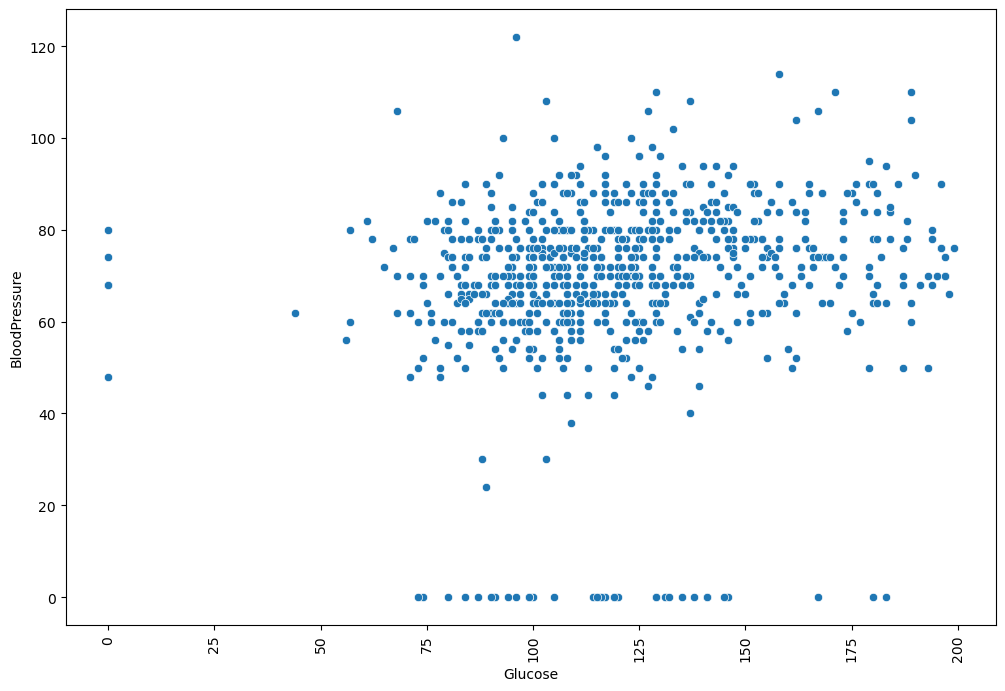

In [24]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Glucose', y = 'BloodPressure', data = df)
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

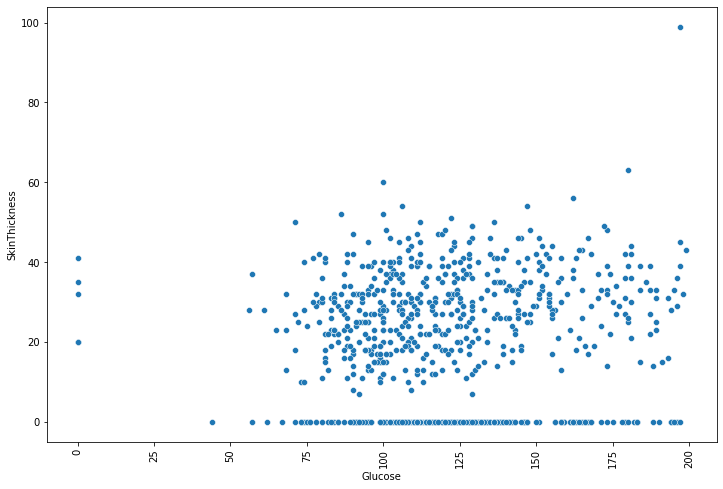

In [10]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Glucose', y = 'SkinThickness', data = df)
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

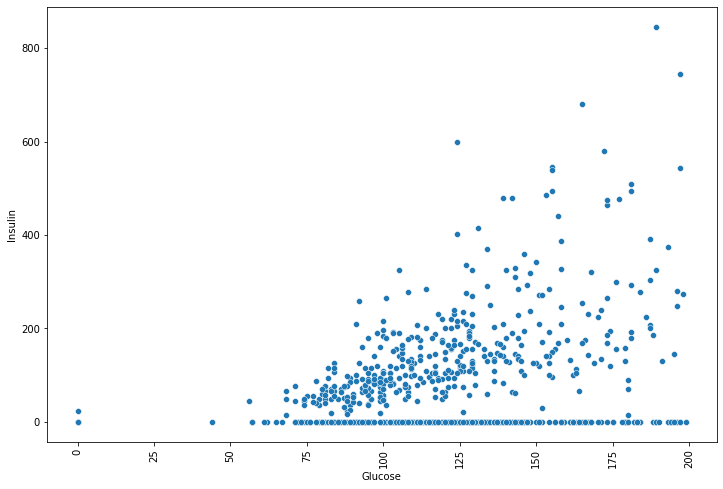

In [11]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Glucose', y = 'Insulin', data = df)
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

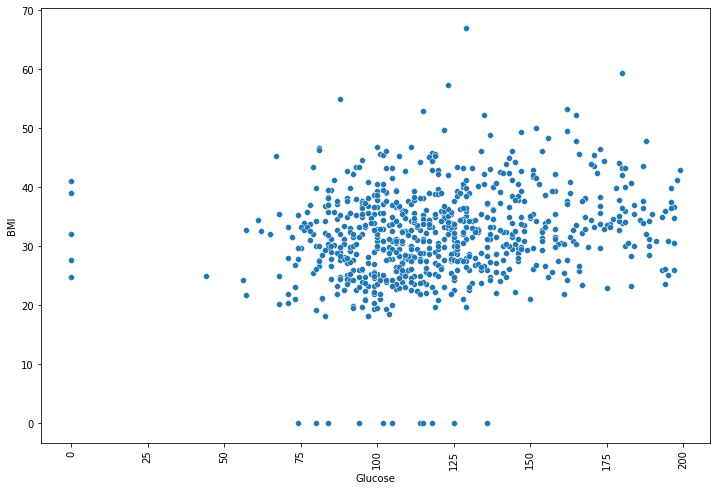

In [12]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Glucose', y = 'BMI', data = df)
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

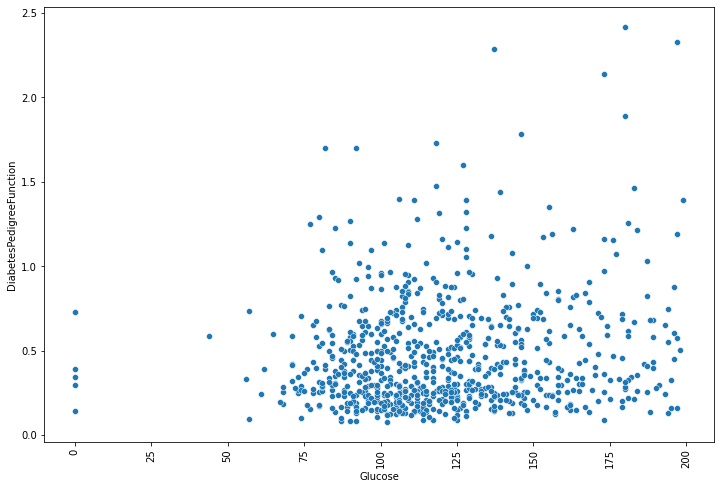

In [13]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Glucose', y = 'DiabetesPedigreeFunction', data = df)
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

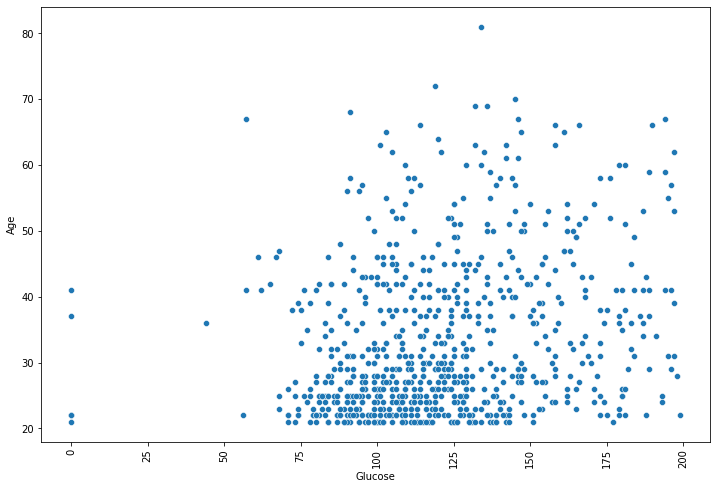

In [14]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Glucose', y = 'Age', data = df)
plt.xticks(rotation = 90)

In [15]:
col_name = X.columns  # Get columns names of the dataframe
col_name

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Data normalization

In [16]:
for i in col_name:
    # Normalize the feature 'customerid'
    norm = Normalizer()
    norm.fit(X[i].values.reshape(-1, 1))
    X[i] = norm.transform(X[i].values.reshape(-1, 1))  

In [17]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Split data into train and test sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Training K-NN model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
pred = neigh.predict(X_test)

In [21]:
pred

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)

In [23]:
print("Accuracy of the K-NN model is: ", accuracy)

Accuracy of the K-NN model is:  0.65748031496063


In [24]:
prediction = neigh.predict([[148, 72, 35, 0, 33.6, 0.627, 50]])

In [25]:
print(prediction)

['Normal']
